In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [26]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(8000, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x 

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
#         self.conv2 = nn.Conv2d(12, 24, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(384, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 384)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x)
    
net = Network()

import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])

mnist_train = datasets.MNIST(root = './data', train = True, download = True, transform = None)
mnist_test = datasets.MNIST(root = './data', train = True,
                                             download = True, 
                                             transform = transform)
trainloader = torch.utils.data.DataLoader(mnist_test, batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.5)

params = list(net.parameters())

import torchvision

for epoch in range(3):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        optimizer.zero_grad()
        
        outputs = net(inputs)
#         loss = F.nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'{epoch+1}, {i + 1:5d}: loss: {loss.item()}')
            running_loss = 0.0
        
print('finished_training')


1,     1: loss: 2.297936201095581
1,   101: loss: 0.6373361945152283
1,   201: loss: 0.5578991174697876
1,   301: loss: 0.23046967387199402
1,   401: loss: 0.19332776963710785
1,   501: loss: 0.13851019740104675
1,   601: loss: 0.1196812242269516
1,   701: loss: 0.1383088082075119
1,   801: loss: 0.07012719660997391
1,   901: loss: 0.10751219093799591
2,     1: loss: 0.02877780795097351
2,   101: loss: 0.18167950212955475
2,   201: loss: 0.08664415776729584
2,   301: loss: 0.21930985152721405
2,   401: loss: 0.15636086463928223
2,   501: loss: 0.090609110891819
2,   601: loss: 0.1502755731344223
2,   701: loss: 0.035644639283418655
2,   801: loss: 0.15828996896743774
2,   901: loss: 0.035976339131593704
3,     1: loss: 0.10335438698530197
3,   101: loss: 0.026151880621910095
3,   201: loss: 0.025211570784449577
3,   301: loss: 0.0368092842400074
3,   401: loss: 0.043653640896081924
3,   501: loss: 0.05202537775039673
3,   601: loss: 0.05056406185030937
3,   701: loss: 0.066723316907882

In [28]:
import irnet

mod_ver = 2

if mod_ver == 1:
    model = irnet.IRNet()
    model.load_state_dict(torch.load('model-geometric-1-.pt'))
    model.eval()
    print("model verion 1.0")
else:
    model = irnet.IRNet()
    model.load_state_dict(torch.load('model-geometric-1b-.pt'))
    model.eval()
    print("model verion 2.0")

model verion 2.0


torch.Size([1, 1, 224, 224])


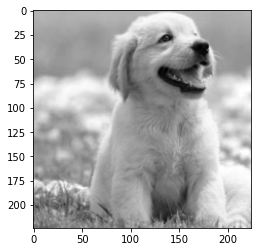

In [59]:
## Set and remove the activation hooks for specified layers
from torchvision import transforms
from PIL import Image

filename = 'images/puppy.jpg'
sample_img = Image.open(filename)
sample_img = preprocess(sample_img)
sample_img = sample_img[0].reshape(1, 1, 224, -1)

print(sample_img.shape)
plt.imshow(sample_img[0, 0, :, :], cmap = 'gray')

In [34]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

sample_img = Image.open(filename)
sample_img = preprocess(sample_img)
sample_img = sample_img[0].reshape(1, 1, 224, -1)

dic = 0
dic = {}
dict_len = range(8)

def getactivation(name):
    def hook_func(m , inp ,op):
        dic[name] = op.detach()
    return hook_func


def create_name(name, model, layer_num):
    hook = {}
    for n, ln in zip(name, layer_num):
        hook[n] = model[ln]
    return hook


def f_hook(hook, name, var):    
    k = {}
    for n, v in zip(name, var):
        k[v] = hook[n].register_forward_hook(getactivation(v))
    return k
        
def remove_hook(k):
    for i in dict_len:
        k['c{}'.format(i)].remove()
    c1.remove()


name = []
var = []
for i in dict_len:
    n = 'conv{}'.format(i+1)
    v = 'c{}'.format(i+1)
    name.append(n)
    var.append(v)

hook = create_name(name, model.elayers, dict_len)
k = f_hook(hook, name, var)

output = model((sample_img))

output = output.detach().numpy()
for i in dict_len:
    print(dic['c{}'.format(i+1)].shape)

torch.Size([1, 32, 224, 224])
torch.Size([1, 32, 224, 224])
torch.Size([1, 32, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])


In [61]:
model.eval()

IRNet(
  (elayers): ModuleList(
    (0): Sequential(
      (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (1): Sequential(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (2): Sequential(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (3): Sequential(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mod

In [30]:
## Isolate the weights for the convolutional layers

params = list(model.parameters())
nparams = list(model.named_parameters())
params[4].shape

torch.Size([32, 32, 3, 3])

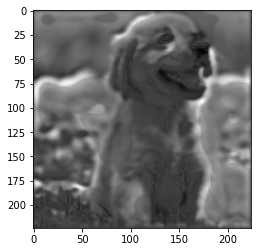

In [31]:
plt.imshow(output[0].transpose(1, 2, 0), cmap = 'gray')

torch.Size([32, 3, 3])


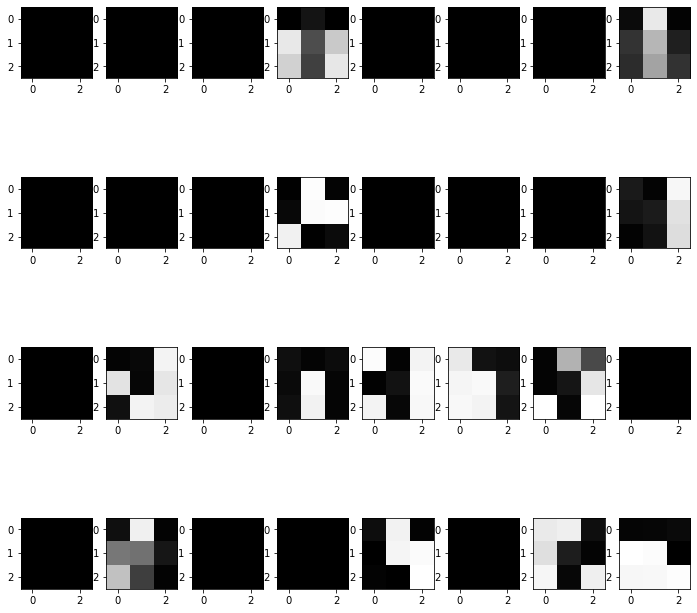

In [15]:
## Plot the weights tensors for the convolutional layers as an image

from PIL import Image
import matplotlib.pyplot as plt

trans = torchvision.transforms.ToPILImage()

conv1_w = params[4][0]
print(params[4][0].shape)

_, axs = plt.subplots(4, 8, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(conv1_w, axs):
    ax.imshow(trans(img), cmap='gray', vmin=0, vmax=255)
plt.show()

In [16]:
## Get a random sample image and label from the dataloder

for img, label in trainloader:
    sample_img = img[0]
    sample_label = label[0]

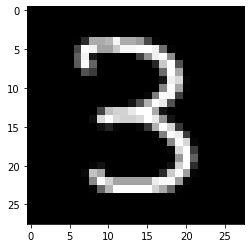

In [17]:
plt.imshow(sample_img[0], cmap = 'gray')

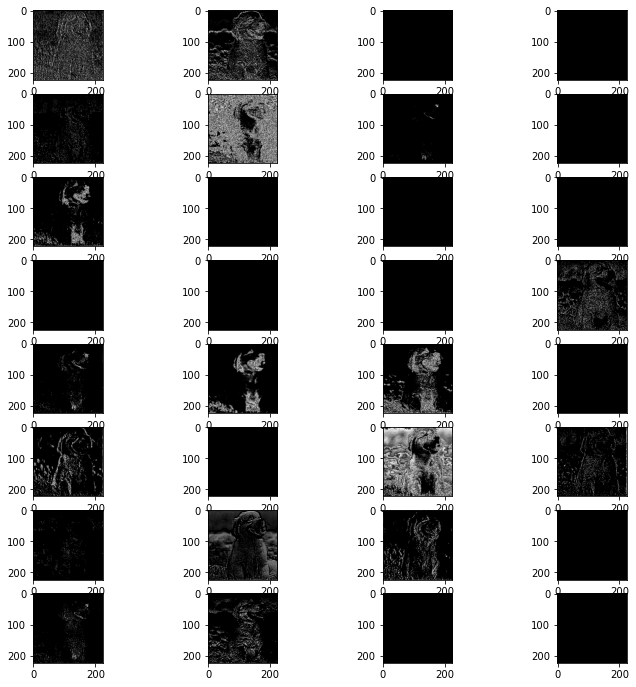

torch.Size([1, 32, 224, 224])

In [51]:
## Plot the activations for the first conv layer `conv1`

layer = 'c2'

_, axs = plt.subplots(8, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic[layer][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()
dic[layer].shape

In [ ]:
_, axs = plt.subplots(8, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c2'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()
dic['c2'].shape

In [ ]:
params = list(model.named_parameters())
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
